In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load .mat file
expt_name = 'test_v7_M36_CalVal_M33_SM_3h__6yr'
# expt_name = 'v7_M36_USCRN_SM_3h_c1234smv_6yr'
# expt_name = 'v7_M36_CalVal_M33_SM_3h__6yr'
mat_filename = '../test_data/SMAP/' + expt_name + '_stats.mat'
mat_contents = sio.loadmat(mat_filename)

In [3]:
# Print keys
print(mat_contents.keys())

# Read data
INSITU_id = mat_contents['INSITU_id']

id_list = INSITU_id[0].tolist()
id_list = [str(id[0]) for id in id_list]

INSITU_lat = mat_contents['INSITU_lat']
INSITU_lon = mat_contents['INSITU_lon']
ind_tile = mat_contents['ind_tile']

Bias = mat_contents['Bias']
BiasLO = mat_contents['BiasLO']
BiasUP = mat_contents['BiasUP']

RMSE = mat_contents['RMSE']
RMSELO = mat_contents['RMSELO']
RMSEUP = mat_contents['RMSEUP']

R = mat_contents['R']
RLO = mat_contents['RLO']
RUP = mat_contents['RUP']

absBias = mat_contents['absBias']
absBiasLO = mat_contents['absBiasLO']
absBiasUP = mat_contents['absBiasUP']

anomR = mat_contents['anomR']
anomRLO = mat_contents['anomRLO']
anomRUP = mat_contents['anomRUP']

ubRMSE = mat_contents['ubRMSE']
ubRMSELO = mat_contents['ubRMSELO']
ubRMSEUP = mat_contents['ubRMSEUP']


dict_keys(['__header__', '__version__', '__globals__', 'Bias', 'BiasLO', 'BiasUP', 'INSITU_id', 'INSITU_id_string', 'INSITU_lat', 'INSITU_lon', 'INSITU_path', 'INSITU_st', 'INSITU_tag', 'LDAS_st_org', 'N_data', 'Nday_shift', 'Nday_window', 'Nmin', 'Nmin_day', 'R', 'RLO', 'RMSE', 'RMSELO', 'RMSEUP', 'RUP', 'absBias', 'absBiasLO', 'absBiasUP', 'add_anomR', 'anomR', 'anomRLO', 'anomRUP', 'data_ext', 'date_time', 'date_time_string', 'date_time_vec', 'date_time_vec1', 'day_vec', 'distance', 'distance_min', 'dofyr', 'dofyr_list', 'domain', 'doy', 'doy_vec', 'dtstep', 'end_time', 'end_time_tmp', 'exp_path', 'exp_run', 'file_ext', 'file_tag', 'fname', 'fname_tilecoord', 'fname_tmp', 'fout_name', 'fout_path', 'i', 'id', 'ind', 'ind_end_time', 'ind_hour', 'ind_start_time', 'ind_t', 'ind_tile', 'ind_tmp', 'insitu_anom', 'insitu_clim', 'insitu_data', 'it', 'j', 'kk', 'max_distance', 'model_anom', 'model_clim', 'model_data', 'month_vec', 'nc', 'nn', 'nodata_tol', 'nodata_val', 'nv', 'out_collection

In [4]:

# Get info about ubRMSE
print(ubRMSE.shape)
print(ubRMSE.dtype)

num_sites = ubRMSE.shape[0]
print("num_sites: ", num_sites)

num_depths = ubRMSE.shape[1]
print("num_depths: ", num_depths)

num_expts = ubRMSE.shape[2]
print("num_expts: ", num_expts)

(18, 2, 4)
float64
num_sites:  18
num_depths:  2
num_expts:  4


In [5]:
# Plot bar chart of ubRMSE for both depths, for the three experiments at each site with error bars
width = 0.2
ind = np.arange(num_sites)

expt_labels = ["ASCAT", "SMAP", "OL", "S&A"]


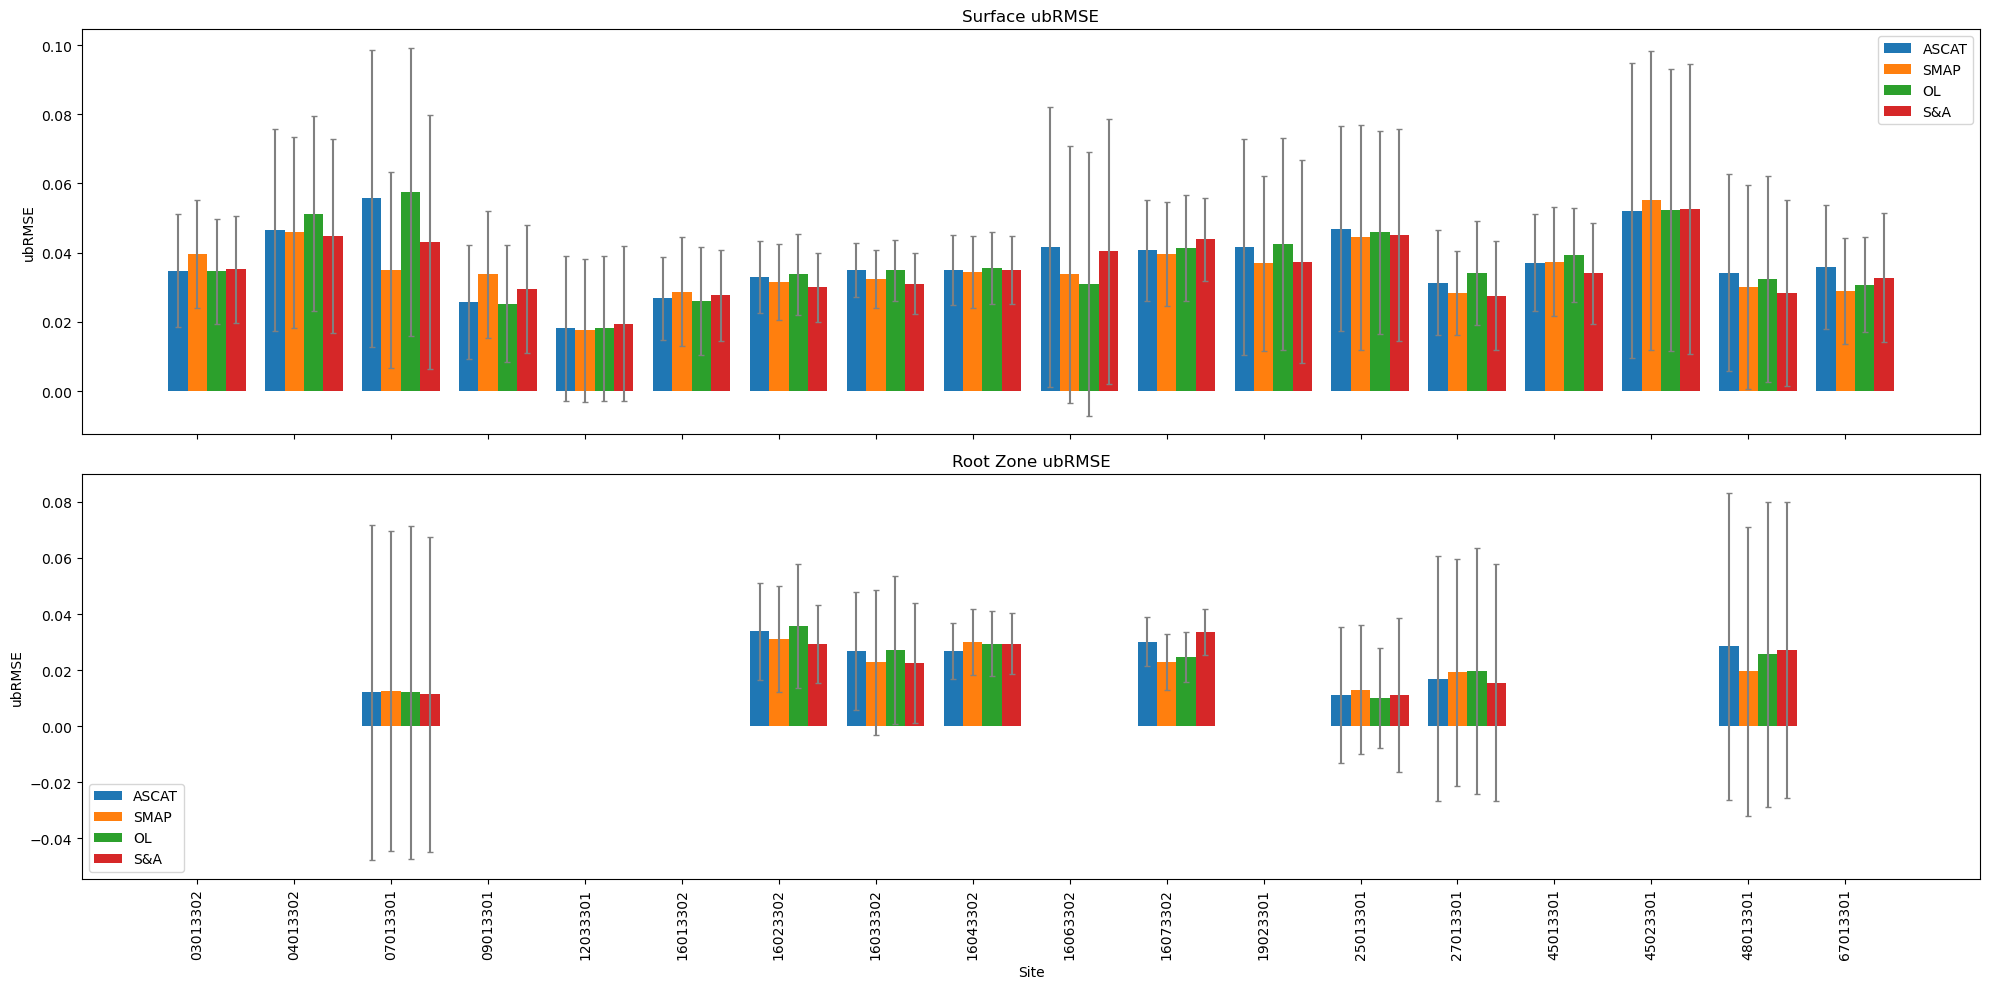

In [6]:


# Create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(20, 10), sharex=True)

# Plot bar chart of ubRMSE for Surface (depth 0) in the top subplot
for expt in range(num_expts):
    axs[0].bar(ind + expt * width, ubRMSE[:, 0, expt], width, label=expt_labels[expt])

# Add error bars for ubRSMEUP and ubRMSELO for Surface
for expt in range(num_expts):
    axs[0].errorbar(ind + expt * width, ubRMSE[:, 0, expt], yerr=[-ubRMSELO[:, 0, expt], ubRMSEUP[:, 0, expt]], fmt='none', color='grey', capsize=2)

axs[0].set_ylabel('ubRMSE')
axs[0].set_title('Surface ubRMSE')
axs[0].legend()

# Plot bar chart of ubRMSE for Root zone (depth 1) in the bottom subplot
for expt in range(num_expts):
    axs[1].bar(ind + expt * width, ubRMSE[:, 1, expt], width, label=expt_labels[expt])

# Add error bars for ubRSMEUP and ubRMSELO for Root zone
for expt in range(num_expts):
    axs[1].errorbar(ind + expt * width, ubRMSE[:, 1, expt], yerr=[-ubRMSELO[:, 1, expt], ubRMSEUP[:, 1, expt]], fmt='none', color='grey', capsize=2)

axs[1].set_xlabel('Site')
axs[1].set_ylabel('ubRMSE')
axs[1].set_title('Root Zone ubRMSE')
axs[1].legend()

plt.xticks(ind + width, id_list, rotation=90)
plt.tight_layout()

plt.savefig(expt_name + '_ubRMSE.png')

plt.show()

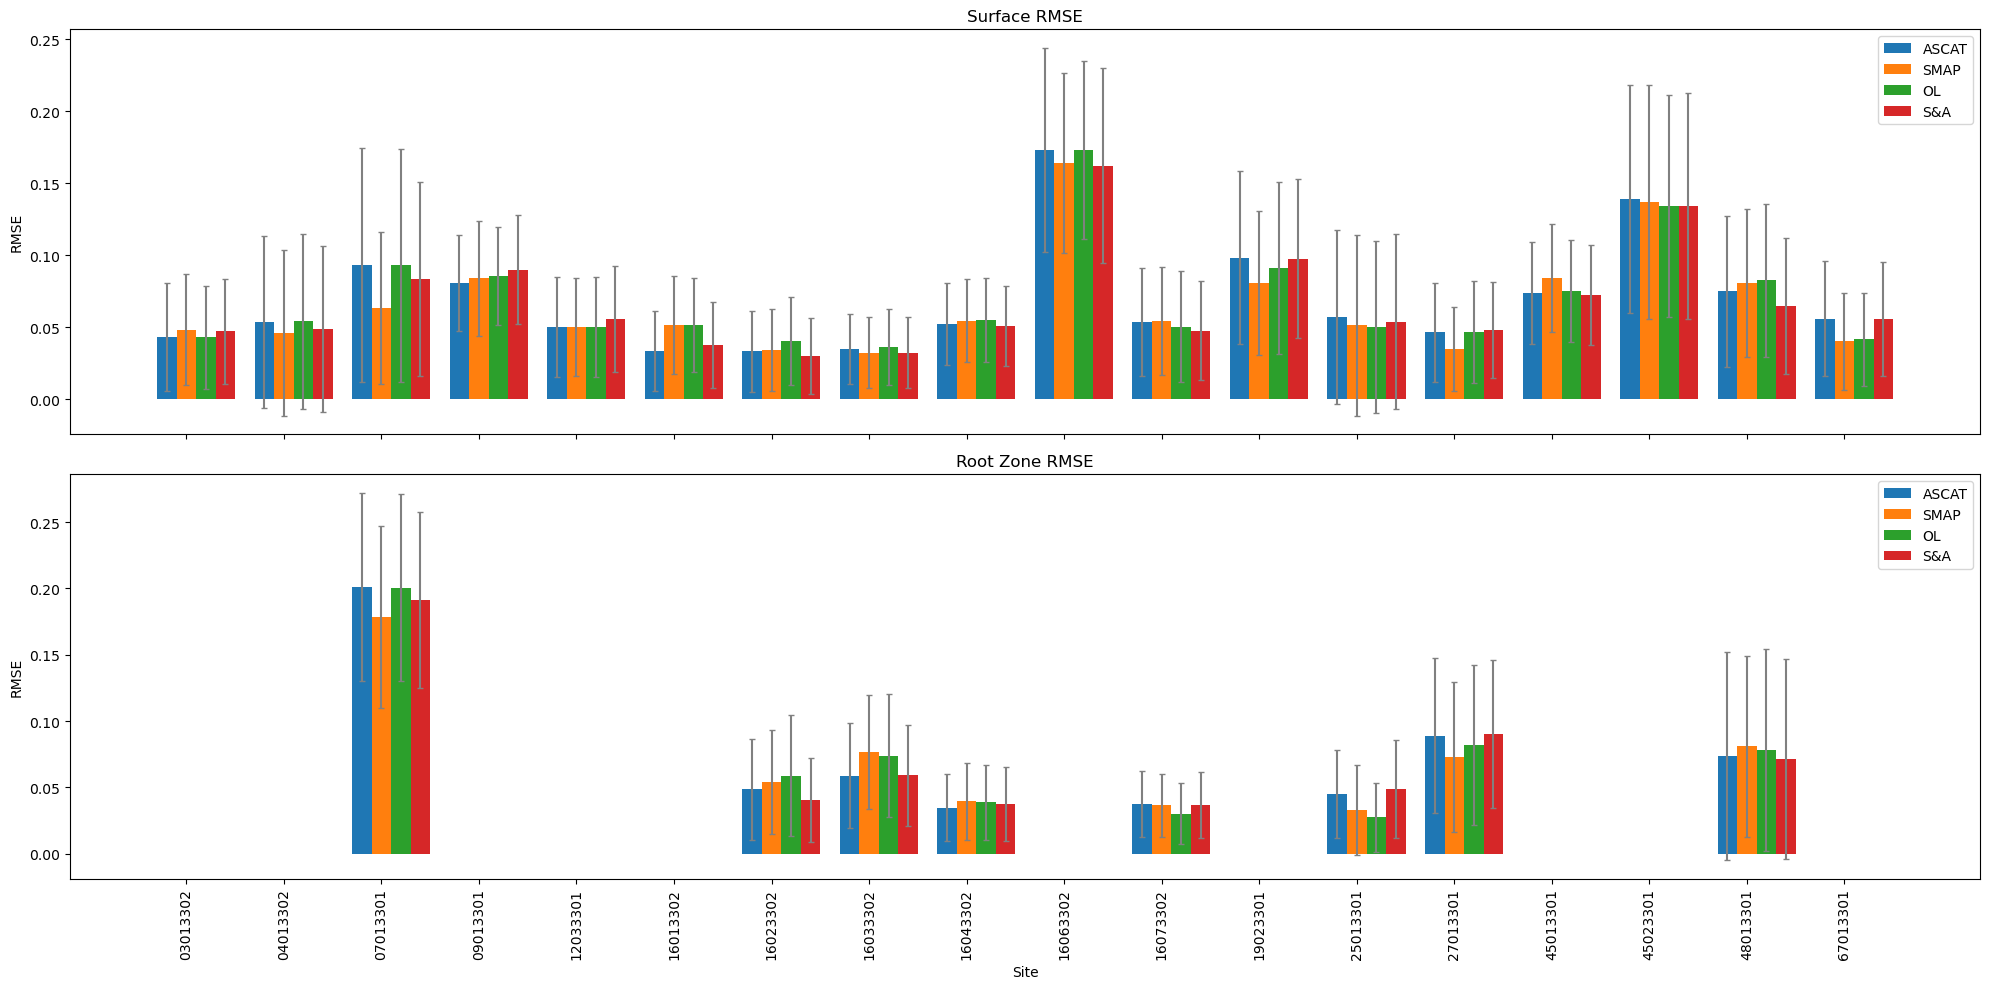

In [7]:
# Create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(20, 10), sharex=True)

# Plot bar chart of RMSE for Surface (depth 0) in the top subplot
for expt in range(num_expts):
    axs[0].bar(ind + expt * width, RMSE[:, 0, expt], width, label=expt_labels[expt])

# Add error bars for RMSEUP and RMSELO for Surface
for expt in range(num_expts):
    axs[0].errorbar(ind + expt * width, RMSE[:, 0, expt], yerr=[-RMSELO[:, 0, expt], RMSEUP[:, 0, expt]], fmt='none', color='grey', capsize=2)

axs[0].set_ylabel('RMSE')
axs[0].set_title('Surface RMSE')
axs[0].legend()

# Plot bar chart of RMSE for Root zone (depth 1) in the bottom subplot
for expt in range(num_expts):
    axs[1].bar(ind + expt * width, RMSE[:, 1, expt], width, label=expt_labels[expt])

# Add error bars for RMSEUP and RMSELO for Root zone
for expt in range(num_expts):
    axs[1].errorbar(ind + expt * width, RMSE[:, 1, expt], yerr=[-RMSELO[:, 1, expt], RMSEUP[:, 1, expt]], fmt='none', color='grey', capsize=2)

axs[1].set_xlabel('Site')
axs[1].set_ylabel('RMSE')
axs[1].set_title('Root Zone RMSE')
axs[1].legend()

plt.xticks(ind + width, id_list, rotation=90)
plt.tight_layout()

plt.savefig(expt_name + '_RMSE.png')

plt.show()

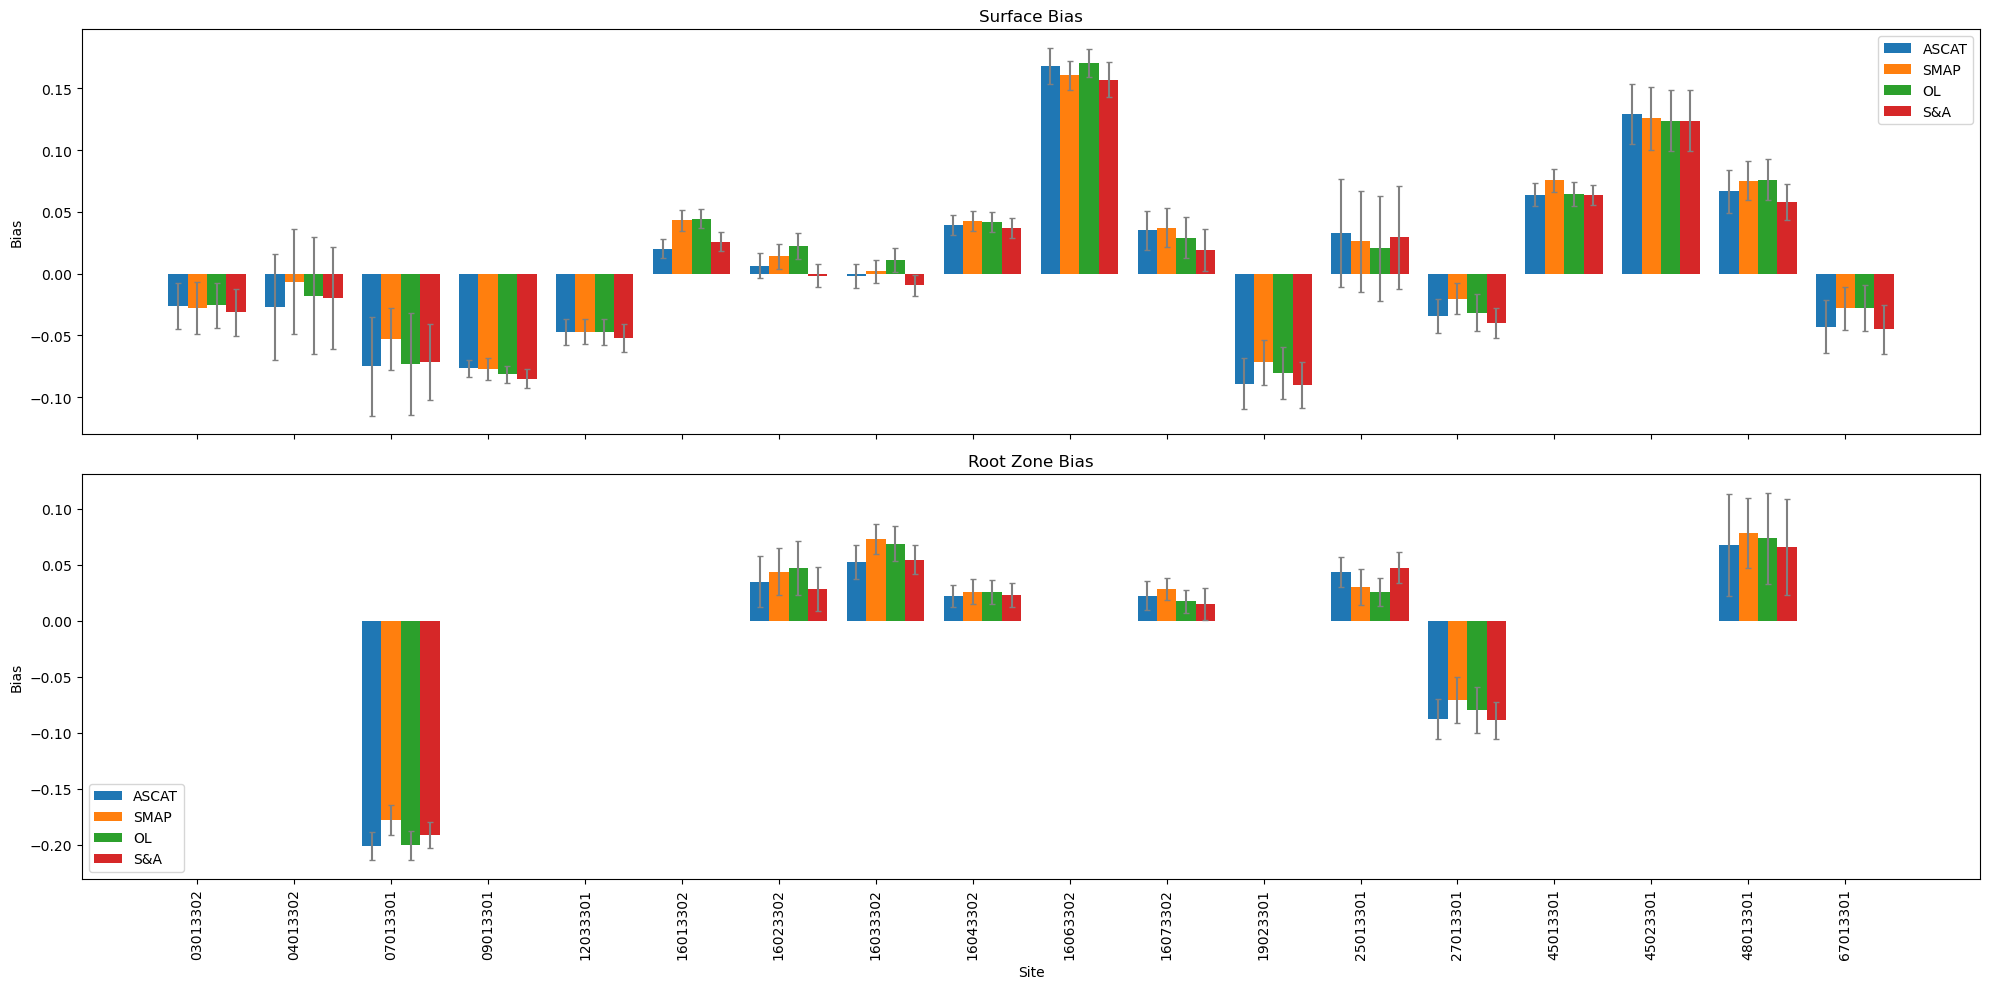

In [8]:
# Create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(20, 10), sharex=True)

## Plot bar chart of Bias for Surface (depth 0) in the top subplot
for expt in range(num_expts):
    axs[0].bar(ind + expt * width, Bias[:, 0, expt], width, label=expt_labels[expt])

# Add error bars for BiasUP and BiasLO for Surface
for expt in range(num_expts):
    axs[0].errorbar(ind + expt * width, Bias[:, 0, expt], yerr=[-BiasLO[:, 0, expt], BiasUP[:, 0, expt]], fmt='none', color='grey', capsize=2)

axs[0].set_ylabel('Bias')
axs[0].set_title('Surface Bias')
axs[0].legend()

# Plot bar chart of Bias for Root zone (depth 1) in the bottom subplot
for expt in range(num_expts):
    axs[1].bar(ind + expt * width, Bias[:, 1, expt], width, label=expt_labels[expt])

# Add error bars for BiasUP and BiasLO for Root zone
for expt in range(num_expts):
    axs[1].errorbar(ind + expt * width, Bias[:, 1, expt], yerr=[-BiasLO[:, 1, expt], BiasUP[:, 1, expt]], fmt='none', color='grey', capsize=2)

axs[1].set_xlabel('Site')
axs[1].set_ylabel('Bias')
axs[1].set_title('Root Zone Bias')
axs[1].legend()

plt.xticks(ind + width, id_list, rotation=90)
plt.tight_layout()

plt.savefig(expt_name + '_Bias.png')

plt.show()

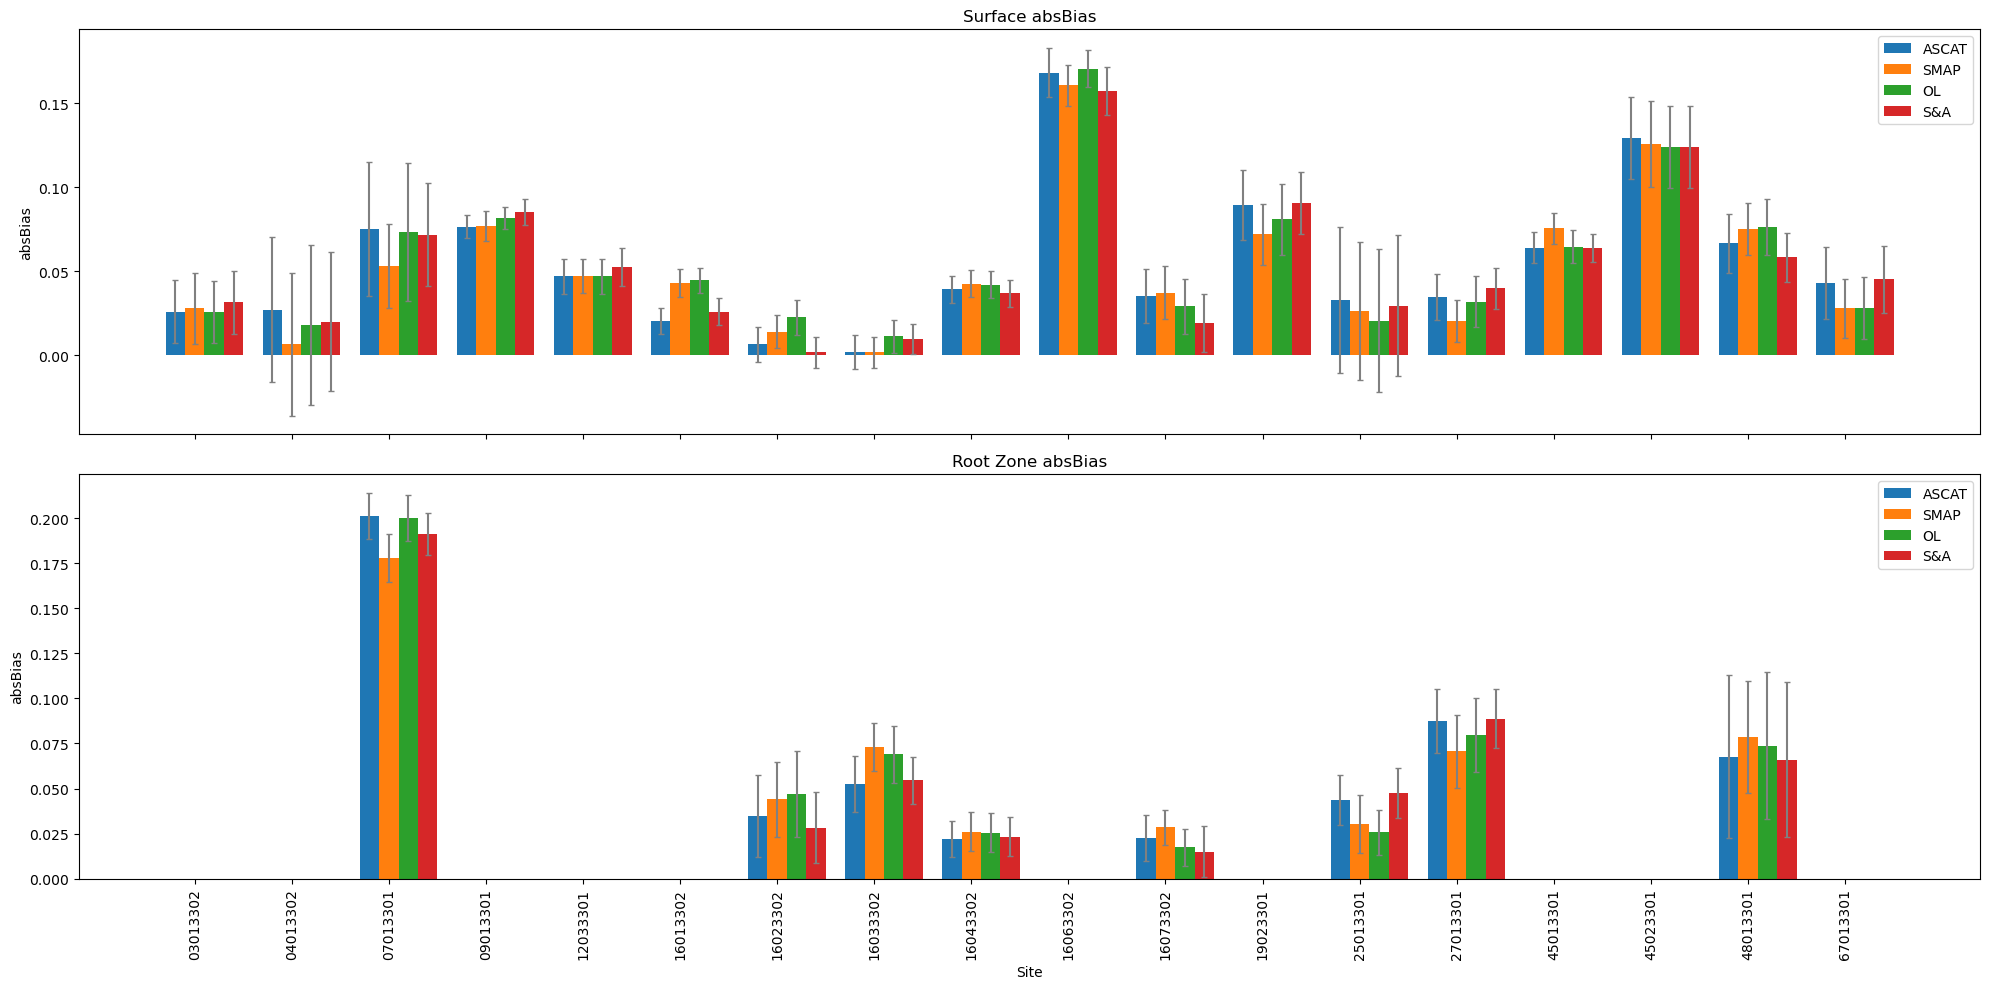

In [9]:
# Create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(20, 10), sharex=True)

# Plot bar chart of absBias for Surface (depth 0) in the top subplot
for expt in range(num_expts):
    axs[0].bar(ind + expt * width, absBias[:, 0, expt], width, label=expt_labels[expt])

# Add error bars for absBiasUP and absBiasLO for Surface
for expt in range(num_expts):
    axs[0].errorbar(ind + expt * width, absBias[:, 0, expt], yerr=[-absBiasLO[:, 0, expt], absBiasUP[:, 0, expt]], fmt='none', color='grey', capsize=2)

axs[0].set_ylabel('absBias')
axs[0].set_title('Surface absBias')
axs[0].legend()

# Plot bar chart of absBias for Root zone (depth 1) in the bottom subplot
for expt in range(num_expts):
    axs[1].bar(ind + expt * width, absBias[:, 1, expt], width, label=expt_labels[expt])

# Add error bars for absBiasUP and absBiasLO for Root zone
for expt in range(num_expts):
    axs[1].errorbar(ind + expt * width, absBias[:, 1, expt], yerr=[-absBiasLO[:, 1, expt], absBiasUP[:, 1, expt]], fmt='none', color='grey', capsize=2)

axs[1].set_xlabel('Site')
axs[1].set_ylabel('absBias')
axs[1].set_title('Root Zone absBias')
axs[1].legend()

plt.xticks(ind + width, id_list, rotation=90)
plt.tight_layout()

plt.savefig(expt_name + '_absBias.png')

plt.show()

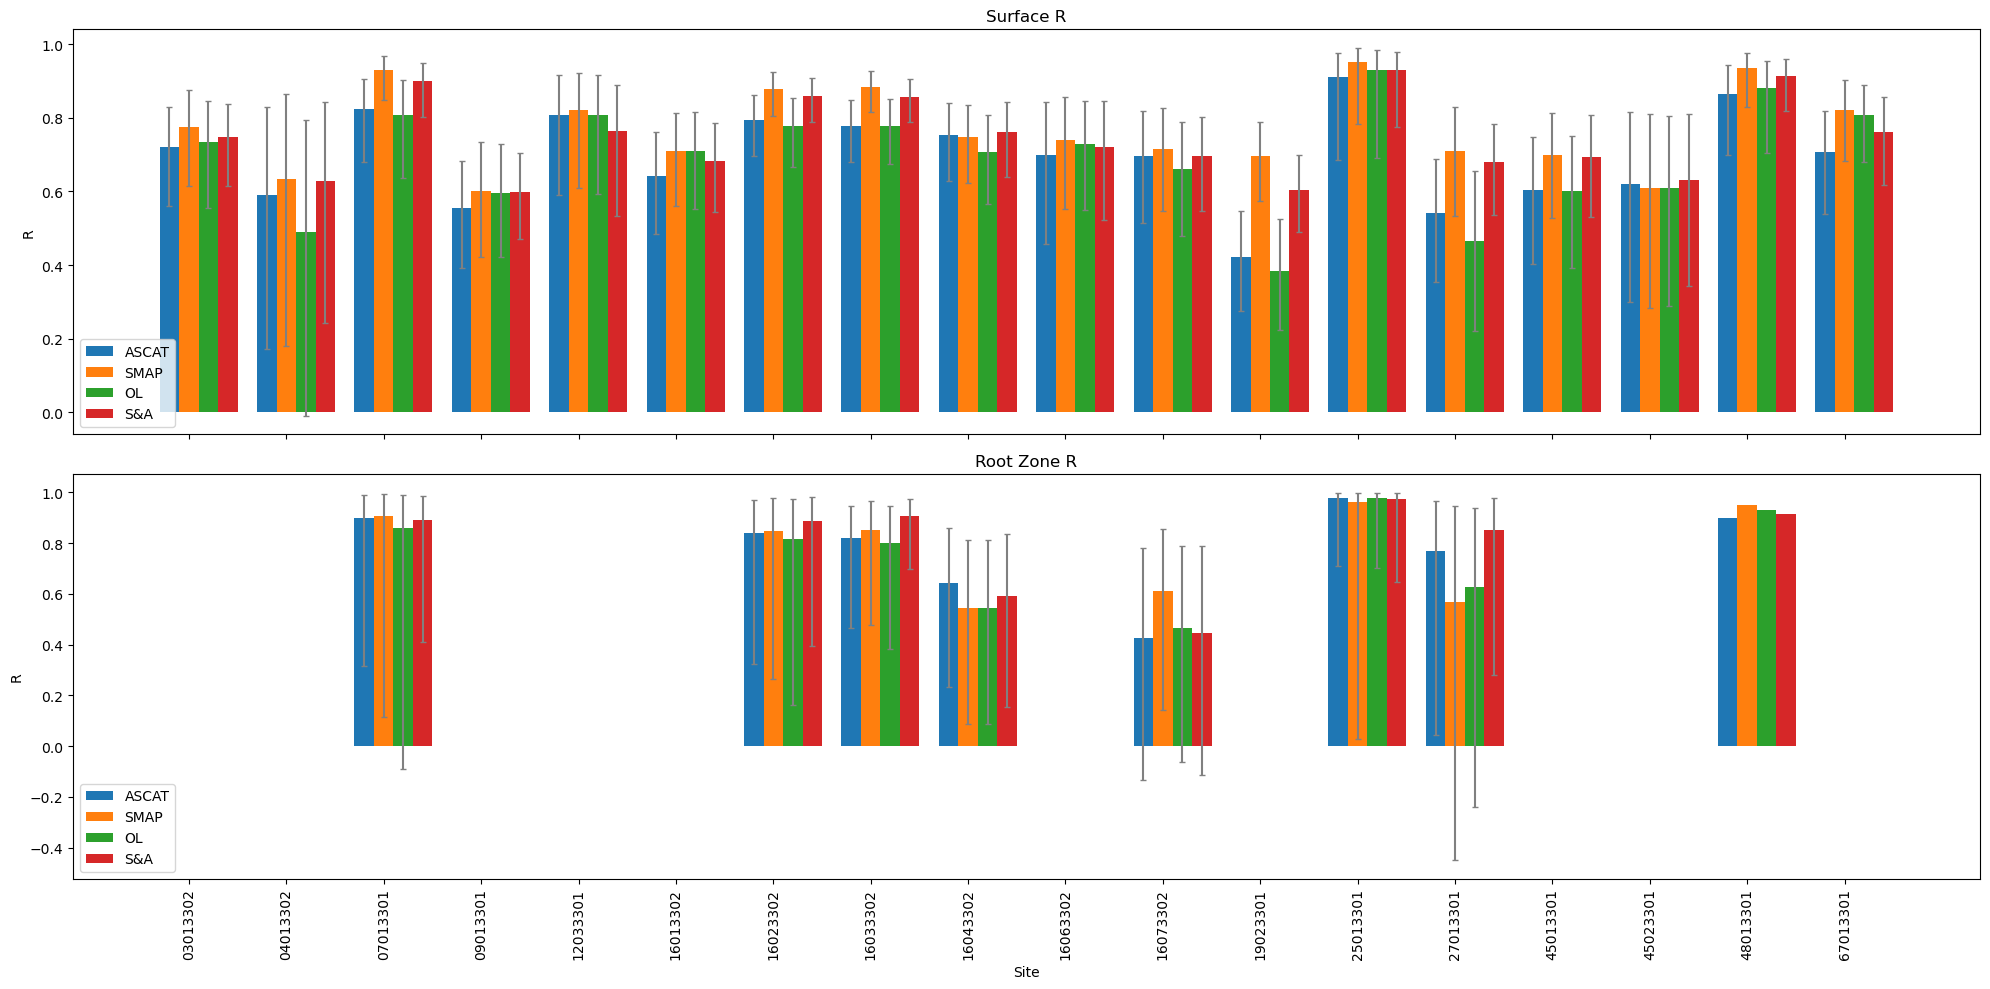

In [10]:
# Create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(20, 10), sharex=True)

# Plot bar chart of R for Surface (depth 0) in the top subplot
for expt in range(num_expts):
    axs[0].bar(ind + expt * width, R[:, 0, expt], width, label=expt_labels[expt])

# Add error bars for RUP and RLO for Surface
for expt in range(num_expts):
    axs[0].errorbar(ind + expt * width, R[:, 0, expt], yerr=[-RLO[:, 0, expt], RUP[:, 0, expt]], fmt='none', color='grey', capsize=2)

axs[0].set_ylabel('R')
axs[0].set_title('Surface R')
axs[0].legend()

# Plot bar chart of R for Root zone (depth 1) in the bottom subplot
for expt in range(num_expts):
    axs[1].bar(ind + expt * width, R[:, 1, expt], width, label=expt_labels[expt])

# Add error bars for RUP and RLO for Root zone
for expt in range(num_expts):
    axs[1].errorbar(ind + expt * width, R[:, 1, expt], yerr=[-RLO[:, 1, expt], RUP[:, 1, expt]], fmt='none', color='grey', capsize=2)

axs[1].set_xlabel('Site')
axs[1].set_ylabel('R')
axs[1].set_title('Root Zone R')
axs[1].legend()

plt.xticks(ind + width, id_list, rotation=90)
plt.tight_layout()

plt.savefig(expt_name + '_R.png')

plt.show()

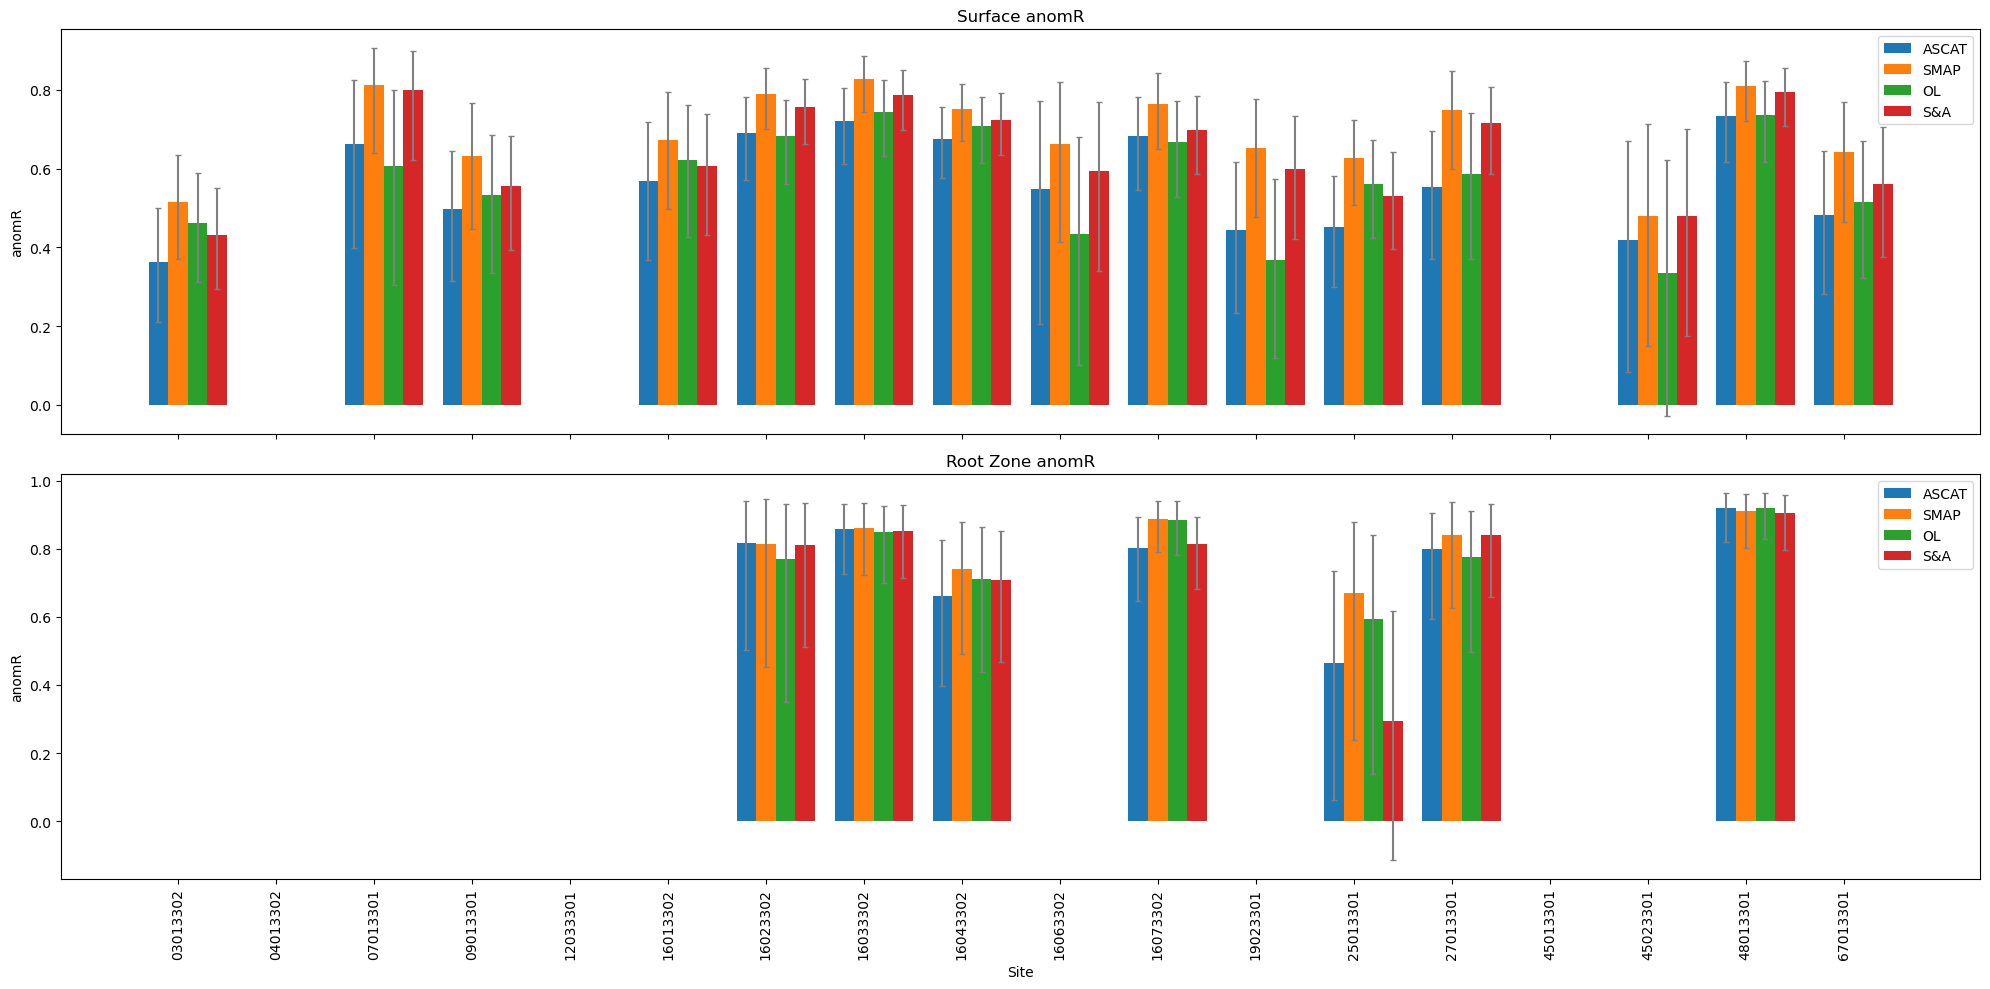

In [11]:
# Create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(20, 10), sharex=True)

# Plot bar chart of anomR for Surface (depth 0) in the top subplot
for expt in range(num_expts):
    axs[0].bar(ind + expt * width, anomR[:, 0, expt], width, label=expt_labels[expt])

# Add error bars for anomRUP and anomRLO for Surface
for expt in range(num_expts):
    axs[0].errorbar(ind + expt * width, anomR[:, 0, expt], yerr=[-anomRLO[:, 0, expt], anomRUP[:, 0, expt]], fmt='none', color='grey', capsize=2)

axs[0].set_ylabel('anomR')
axs[0].set_title('Surface anomR')
axs[0].legend()

# Plot bar chart of anomR for Root zone (depth 1) in the bottom subplot
for expt in range(num_expts):
    axs[1].bar(ind + expt * width, anomR[:, 1, expt], width, label=expt_labels[expt])

# Add error bars for anomRUP and anomRLO for Root zone
for expt in range(num_expts):
    axs[1].errorbar(ind + expt * width, anomR[:, 1, expt], yerr=[-anomRLO[:, 1, expt], anomRUP[:, 1, expt]], fmt='none', color='grey', capsize=2)

axs[1].set_xlabel('Site')
axs[1].set_ylabel('anomR')
axs[1].set_title('Root Zone anomR')
axs[1].legend()

plt.xticks(ind + width, id_list, rotation=90)
plt.tight_layout()

plt.savefig(expt_name + '_anomR.png')

plt.show()

In [12]:
# Calculate R_mean, Bias, RMSE, and ubRMSE from R
R_mean = np.nanmean(R, axis=0)
R_std = np.nanstd(R, axis=0)
anomR_mean = np.nanmean(anomR, axis=0)
anomR_std = np.nanstd(anomR, axis=0)
Bias_mean = np.nanmean(Bias, axis=0)
Bias_std = np.nanstd(Bias, axis=0)
absBias_mean = np.nanmean(absBias, axis=0)
absBias_std = np.nanstd(absBias, axis=0)
RMSE_mean = np.nanmean(RMSE, axis=0)
RMSE_std = np.nanstd(RMSE, axis=0)
ubRMSE_mean = np.nanmean(ubRMSE, axis=0)
ubRMSE_std = np.nanstd(ubRMSE, axis=0)


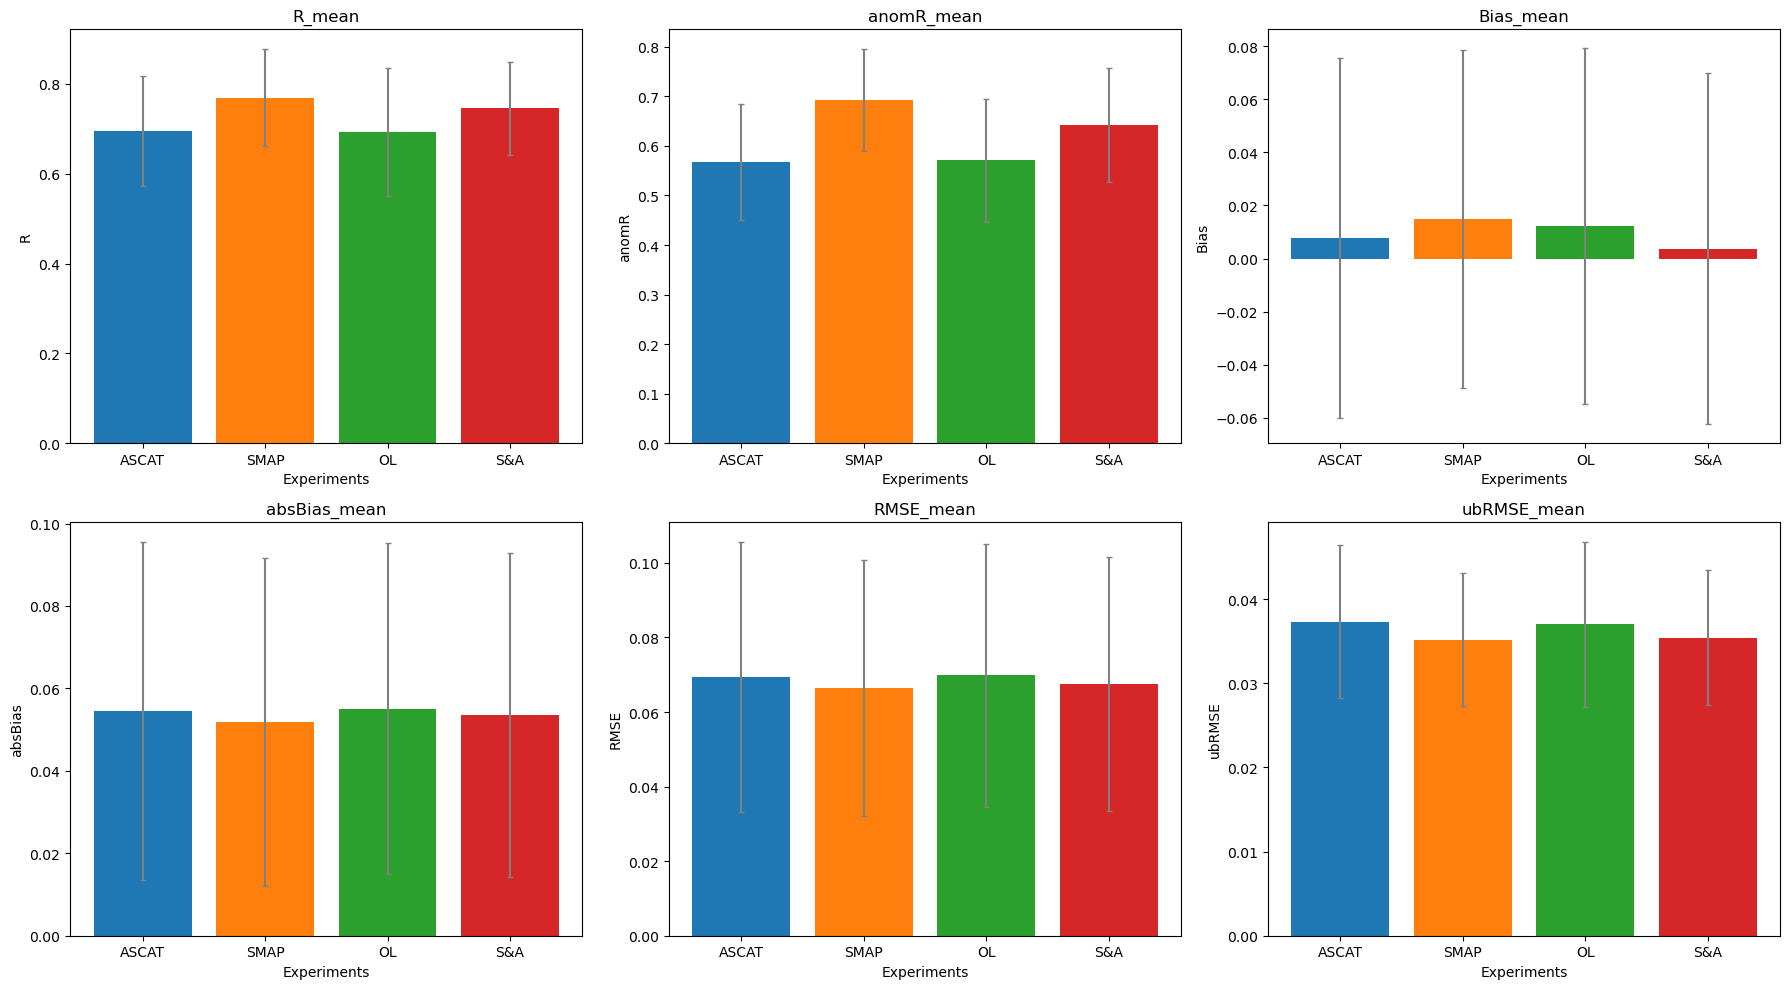

In [13]:

ind = np.arange(num_expts)

# Create a figure with a 2x3 subplot grid
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Subplot 1: R_mean
axs[0, 0].bar(ind, R_mean[0, :num_expts], color=plt.rcParams['axes.prop_cycle'].by_key()['color'][:num_expts])
axs[0, 0].errorbar(ind, R_mean[0, :num_expts], yerr=R_std[0, :num_expts], fmt='none', ecolor='grey', capsize=2)
axs[0, 0].set_xlabel('Experiments')
axs[0, 0].set_ylabel('R')
axs[0, 0].set_title('R_mean')
axs[0, 0].set_xticks(ind)
axs[0, 0].set_xticklabels(expt_labels)

# Subplot 2: anomR_mean
axs[0, 1].bar(ind, anomR_mean[0, :num_expts], color=plt.rcParams['axes.prop_cycle'].by_key()['color'][:num_expts])
axs[0, 1].errorbar(ind, anomR_mean[0, :num_expts], yerr=anomR_std[0, :num_expts], fmt='none', ecolor='grey', capsize=2)
axs[0, 1].set_xlabel('Experiments')
axs[0, 1].set_ylabel('anomR')
axs[0, 1].set_title('anomR_mean')
axs[0, 1].set_xticks(ind)
axs[0, 1].set_xticklabels(expt_labels)

# Subplot 3: Bias_mean
axs[0, 2].bar(ind, Bias_mean[0, :num_expts], color=plt.rcParams['axes.prop_cycle'].by_key()['color'][:num_expts])
axs[0, 2].errorbar(ind, Bias_mean[0, :num_expts], yerr=Bias_std[0, :num_expts], fmt='none', ecolor='grey', capsize=2)
axs[0, 2].set_xlabel('Experiments')
axs[0, 2].set_ylabel('Bias')
axs[0, 2].set_title('Bias_mean')
axs[0, 2].set_xticks(ind)
axs[0, 2].set_xticklabels(expt_labels)

# Subplot 4: absBias_mean
axs[1, 0].bar(ind, absBias_mean[0, :num_expts], color=plt.rcParams['axes.prop_cycle'].by_key()['color'][:num_expts])
axs[1, 0].errorbar(ind, absBias_mean[0, :num_expts], yerr=absBias_std[0, :num_expts], fmt='none', ecolor='grey', capsize=2)
axs[1, 0].set_xlabel('Experiments')
axs[1, 0].set_ylabel('absBias')
axs[1, 0].set_title('absBias_mean')
axs[1, 0].set_xticks(ind)
axs[1, 0].set_xticklabels(expt_labels)

# Subplot 3: RMSE_mean
axs[1, 1].bar(ind, RMSE_mean[0, :num_expts], color=plt.rcParams['axes.prop_cycle'].by_key()['color'][:num_expts])
axs[1, 1].errorbar(ind, RMSE_mean[0, :num_expts], yerr=RMSE_std[0, :num_expts], fmt='none', ecolor='grey', capsize=2)
axs[1, 1].set_xlabel('Experiments')
axs[1, 1].set_ylabel('RMSE')
axs[1, 1].set_title('RMSE_mean')
axs[1, 1].set_xticks(ind)
axs[1, 1].set_xticklabels(expt_labels)

# Subplot 4: ubRMSE_mean
axs[1, 2].bar(ind, ubRMSE_mean[0, :num_expts], color=plt.rcParams['axes.prop_cycle'].by_key()['color'][:num_expts])
axs[1, 2].errorbar(ind, ubRMSE_mean[0, :num_expts], yerr=ubRMSE_std[0, :num_expts], fmt='none', ecolor='grey', capsize=2)
axs[1, 2].set_xlabel('Experiments')
axs[1, 2].set_ylabel('ubRMSE')
axs[1, 2].set_title('ubRMSE_mean')
axs[1, 2].set_xticks(ind)
axs[1, 2].set_xticklabels(expt_labels)

plt.tight_layout()

plt.savefig(expt_name + '_all_stats.png')

plt.show()

In [26]:
from tabulate import tabulate

# Define the data for the table
table_data = [
    ['R_mean'] + [R_mean[0, expt] for expt in range(num_expts)],
    ['anomR_mean'] + [anomR_mean[0, expt] for expt in range(num_expts)],
    ['Bias_mean'] + [Bias_mean[0, expt] for expt in range(num_expts)],
    ['absBias_mean'] + [absBias_mean[0, expt] for expt in range(num_expts)],
    ['RMSE_mean'] + [RMSE_mean[0, expt] for expt in range(num_expts)],
    ['ubRMSE_mean'] + [ubRMSE_mean[0, expt] for expt in range(num_expts)],
]

# Define the headers for the table
table_headers = expt_labels

# Generate the table
table = tabulate(table_data, headers=table_headers, tablefmt='grid')

# Print the table
print(table)

# Generate a table with the same data but in csv format
table = tabulate(table_data, headers=table_headers, tablefmt='plain')

# Save the table to a file
with open(expt_name + '_table_srf.csv', 'w') as file:
    file.write(table)

+--------------+------------+-----------+-----------+------------+
|              |      ASCAT |      SMAP |        OL |        S&A |
+==============+============+===========+===========+============+
| R_mean       | 0.696019   | 0.769601  | 0.692796  | 0.74573    |
+--------------+------------+-----------+-----------+------------+
| anomR_mean   | 0.566809   | 0.692663  | 0.570888  | 0.642105   |
+--------------+------------+-----------+-----------+------------+
| Bias_mean    | 0.00784478 | 0.0150012 | 0.0121695 | 0.00376988 |
+--------------+------------+-----------+-----------+------------+
| absBias_mean | 0.0545723  | 0.051875  | 0.0550879 | 0.0534328  |
+--------------+------------+-----------+-----------+------------+
| RMSE_mean    | 0.0694533  | 0.0663843 | 0.0698337 | 0.0674988  |
+--------------+------------+-----------+-----------+------------+
| ubRMSE_mean  | 0.0373379  | 0.0351918 | 0.0370381 | 0.0354351  |
+--------------+------------+-----------+-----------+---------

In [27]:
from tabulate import tabulate

# Define the data for the table
table_data = [
    ['R_mean'] + [R_mean[1, expt] for expt in range(num_expts)],
    ['anomR_mean'] + [anomR_mean[1, expt] for expt in range(num_expts)],
    ['Bias_mean'] + [Bias_mean[1, expt] for expt in range(num_expts)],
    ['absBias_mean'] + [absBias_mean[1, expt] for expt in range(num_expts)],
    ['RMSE_mean'] + [RMSE_mean[1, expt] for expt in range(num_expts)],
    ['ubRMSE_mean'] + [ubRMSE_mean[1, expt] for expt in range(num_expts)],
]

# Define the headers for the table
table_headers = expt_labels

# Generate the table
table = tabulate(table_data, headers=table_headers, tablefmt='grid')

# Print the table
print(table)

# Generate simple table
table = tabulate(table_data, headers=table_headers, tablefmt='plain')

# Save the table to a file
with open(expt_name + '_table_rz.csv', 'w') as file:
    file.write(table)

+--------------+-------------+------------+------------+-------------+
|              |       ASCAT |       SMAP |         OL |         S&A |
+==============+=============+============+============+=============+
| R_mean       |  0.783967   | 0.78076    |  0.752696  |  0.807322   |
+--------------+-------------+------------+------------+-------------+
| anomR_mean   |  0.759812   | 0.817746   |  0.785974  |  0.746763   |
+--------------+-------------+------------+------------+-------------+
| Bias_mean    | -0.00562911 | 0.00401918 | -0.0026997 | -0.00564912 |
+--------------+-------------+------------+------------+-------------+
| absBias_mean |  0.0664965  | 0.0661446  |  0.0672465 |  0.0643499  |
+--------------+-------------+------------+------------+-------------+
| RMSE_mean    |  0.0736192  | 0.071516   |  0.0737925 |  0.0720084  |
+--------------+-------------+------------+------------+-------------+
| ubRMSE_mean  |  0.0232534  | 0.0213481  |  0.0230403 |  0.0224619  |
+-----

In [31]:
# Calculate the maximum R values for each site and experiment at depth 1
max_R = np.max(R[:, 0, :], axis=1)

# Count the number of sites where each experiment has the highest R value
expt1_best_count = np.sum(max_R == R[:, 0, 0])
expt2_best_count = np.sum(max_R == R[:, 0, 1])
expt3_best_count = np.sum(max_R == R[:, 0, 2])
expt4_best_count = np.sum(max_R == R[:, 0, 3])

print(f"ASCAT is best at {expt1_best_count} sites.")
print(f"SMAP is best at {expt2_best_count} sites.")
print(f"OL is best at {expt3_best_count} sites.")
print(f"S&A is best at {expt4_best_count} sites.")

# Calculate the number of times Experiment 1 is better than Experiment 3
expt1_better_than_expt3_count = np.sum(R[:, 0, 0] > R[:, 0, 2])
expt4_better_than_expt2_count = np.sum(R[:, 0, 3] > R[:, 0, 1])

print(f"ASCAT is better than OL {expt1_better_than_expt3_count} times for R.")
print(f"S&A is better than SMAP {expt4_better_than_expt2_count} times for R.")


ASCAT is best at 0 sites.
SMAP is best at 15 sites.
OL is best at 1 sites.
S&A is best at 2 sites.
ASCAT is better than OL 10 times for R.
S&A is better than SMAP 2 times for R.


In [30]:
# Calculate the maximum anomR values for each site and experiment at depth 1
max_anomR = np.max(anomR[:, 0, :], axis=1)

# Count the number of sites where each experiment has the highest anomR value
expt1_best_count = np.sum(max_anomR == anomR[:, 0, 0])
expt2_best_count = np.sum(max_anomR == anomR[:, 0, 1])
expt3_best_count = np.sum(max_anomR == anomR[:, 0, 2])
expt4_best_count = np.sum(max_anomR == anomR[:, 0, 3])

print(f"ASCAT is best at {expt1_best_count} sites for anomR.")
print(f"SMAP is best at {expt2_best_count} sites for anomR.")
print(f"OL is best at {expt3_best_count} sites for anomR.")
print(f"S&A is best at {expt4_best_count} sites for anomR.")

# Calculate the number of times Experiment 1 is better than Experiment 3 for anomR
expt1_better_than_expt3_count = np.sum(anomR[:, 0, 0] > anomR[:, 0, 2])
expt4_better_than_expt2_count = np.sum(anomR[:, 0, 3] > anomR[:, 0, 1])

print(f"ASCAT is better than OL {expt1_better_than_expt3_count} times for anomR.")
print(f"S&A is better than SMAP {expt4_better_than_expt2_count} times for anomR.")

ASCAT is best at 0 sites for anomR.
SMAP is best at 14 sites for anomR.
OL is best at 0 sites for anomR.
S&A is best at 1 sites for anomR.
ASCAT is better than OL 6 times for anomR.
S&A is better than SMAP 1 times for anomR.


In [32]:
# Calculate the maximum Bias values for each site and experiment at depth 1
max_Bias = np.max(Bias[:, 0, :], axis=1)

# Count the number of sites where each experiment has the highest Bias value
expt1_best_count = np.sum(max_Bias == Bias[:, 0, 0])
expt2_best_count = np.sum(max_Bias == Bias[:, 0, 1])
expt3_best_count = np.sum(max_Bias == Bias[:, 0, 2])
expt4_best_count = np.sum(max_Bias == Bias[:, 0, 3])

print(f"ASCAT is best at {expt1_best_count} sites for Bias.")
print(f"SMAP is best at {expt2_best_count} sites for Bias.")
print(f"OL is best at {expt3_best_count} sites for Bias.")
print(f"S&A is best at {expt4_best_count} sites for Bias.")

# Calculate the number of times Experiment 1 is better than Experiment 3 for Bias
expt1_better_than_expt3_count = np.sum(Bias[:, 0, 0] > Bias[:, 0, 2])
expt4_better_than_expt2_count = np.sum(Bias[:, 0, 3] > Bias[:, 0, 1])

print(f"ASCAT is better than OL {expt1_better_than_expt3_count} times for Bias.")
print(f"S&A is better than SMAP {expt4_better_than_expt2_count} times for Bias.")

ASCAT is best at 4 sites for Bias.
SMAP is best at 8 sites for Bias.
OL is best at 6 sites for Bias.
S&A is best at 0 sites for Bias.
ASCAT is better than OL 5 times for Bias.
S&A is better than SMAP 1 times for Bias.


In [33]:
# Calculate the maximum absBias values for each site and experiment at depth 1
max_absBias = np.max(absBias[:, 0, :], axis=1)

# Count the number of sites where each experiment has the highest absBias value
expt1_best_count = np.sum(max_absBias == absBias[:, 0, 0])
expt2_best_count = np.sum(max_absBias == absBias[:, 0, 1])
expt3_best_count = np.sum(max_absBias == absBias[:, 0, 2])
expt4_best_count = np.sum(max_absBias == absBias[:, 0, 3])

print(f"ASCAT is best at {expt1_best_count} sites for absBias.")
print(f"SMAP is best at {expt2_best_count} sites for absBias.")
print(f"OL is best at {expt3_best_count} sites for absBias.")
print(f"S&A is best at {expt4_best_count} sites for absBias.")

# Calculate the number of times Experiment 1 is better than Experiment 3 for absBias
expt1_better_than_expt3_count = np.sum(absBias[:, 0, 0] > absBias[:, 0, 2])
expt4_better_than_expt2_count = np.sum(absBias[:, 0, 3] > absBias[:, 0, 1])

print(f"ASCAT is better than OL {expt1_better_than_expt3_count} times for absBias.")
print(f"S&A is better than SMAP {expt4_better_than_expt2_count} times for absBias.")

ASCAT is best at 4 sites for absBias.
SMAP is best at 3 sites for absBias.
OL is best at 5 sites for absBias.
S&A is best at 6 sites for absBias.
ASCAT is better than OL 9 times for absBias.
S&A is better than SMAP 10 times for absBias.


In [36]:
# Calculate the maximum RMSE values for each site and experiment at depth 1
max_RMSE = np.max(RMSE[:, 0, :], axis=1)

# Count the number of sites where each experiment has the highest RMSE value
expt1_best_count = np.sum(max_RMSE == RMSE[:, 0, 0])
expt2_best_count = np.sum(max_RMSE == RMSE[:, 0, 1])
expt3_best_count = np.sum(max_RMSE == RMSE[:, 0, 2])
expt4_best_count = np.sum(max_RMSE == RMSE[:, 0, 3])

print(f"ASCAT is best at {expt1_best_count} sites for RMSE.")
print(f"SMAP is best at {expt2_best_count} sites for RMSE.")
print(f"OL is best at {expt3_best_count} sites for RMSE.")
print(f"S&A is best at {expt4_best_count} sites for RMSE.")

# Calculate the number of times Experiment 1 is better than Experiment 3 for RMSE
expt1_better_than_expt3_count = np.sum(RMSE[:, 0, 0] < RMSE[:, 0, 2])
expt4_better_than_expt2_count = np.sum(RMSE[:, 0, 3] < RMSE[:, 0, 1])

print(f"ASCAT is better than OL {expt1_better_than_expt3_count} times for RMSE.")
print(f"S&A is better than SMAP {expt4_better_than_expt2_count} times for RMSE.")

ASCAT is best at 5 sites for RMSE.
SMAP is best at 4 sites for RMSE.
OL is best at 6 sites for RMSE.
S&A is best at 3 sites for RMSE.
ASCAT is better than OL 10 times for RMSE.
S&A is better than SMAP 9 times for RMSE.


In [37]:
# Calculate the maximum ubRMSE values for each site and experiment at depth 1
max_ubRMSE = np.max(ubRMSE[:, 0, :], axis=1)

# Count the number of sites where each experiment has the highest ubRMSE value
expt1_best_count = np.sum(max_ubRMSE == ubRMSE[:, 0, 0])
expt2_best_count = np.sum(max_ubRMSE == ubRMSE[:, 0, 1])
expt3_best_count = np.sum(max_ubRMSE == ubRMSE[:, 0, 2])
expt4_best_count = np.sum(max_ubRMSE == ubRMSE[:, 0, 3])

print(f"ASCAT is best at {expt1_best_count} sites for ubRMSE.")
print(f"SMAP is best at {expt2_best_count} sites for ubRMSE.")
print(f"OL is best at {expt3_best_count} sites for ubRMSE.")
print(f"S&A is best at {expt4_best_count} sites for ubRMSE.")

# Calculate the number of times Experiment 1 is better than Experiment 3 for ubRMSE
expt1_better_than_expt3_count = np.sum(ubRMSE[:, 0, 0] < ubRMSE[:, 0, 2])
expt4_better_than_expt2_count = np.sum(ubRMSE[:, 0, 3] < ubRMSE[:, 0, 1])

print(f"ASCAT is better than OL {expt1_better_than_expt3_count} times for ubRMSE.")
print(f"S&A is better than SMAP {expt4_better_than_expt2_count} times for ubRMSE.")

ASCAT is best at 5 sites for ubRMSE.
SMAP is best at 4 sites for ubRMSE.
OL is best at 7 sites for ubRMSE.
S&A is best at 2 sites for ubRMSE.
ASCAT is better than OL 9 times for ubRMSE.
S&A is better than SMAP 10 times for ubRMSE.


In [20]:
# Create an array to store the best experiment index for each site
best_experiment = np.argmin(ubRMSE[:, 0, :], axis=1)

# Print the best experiment for each site
# for site, experiment in enumerate(best_experiment):
#    print(f"Site {site+1}: Best Experiment = {experiment+1}")

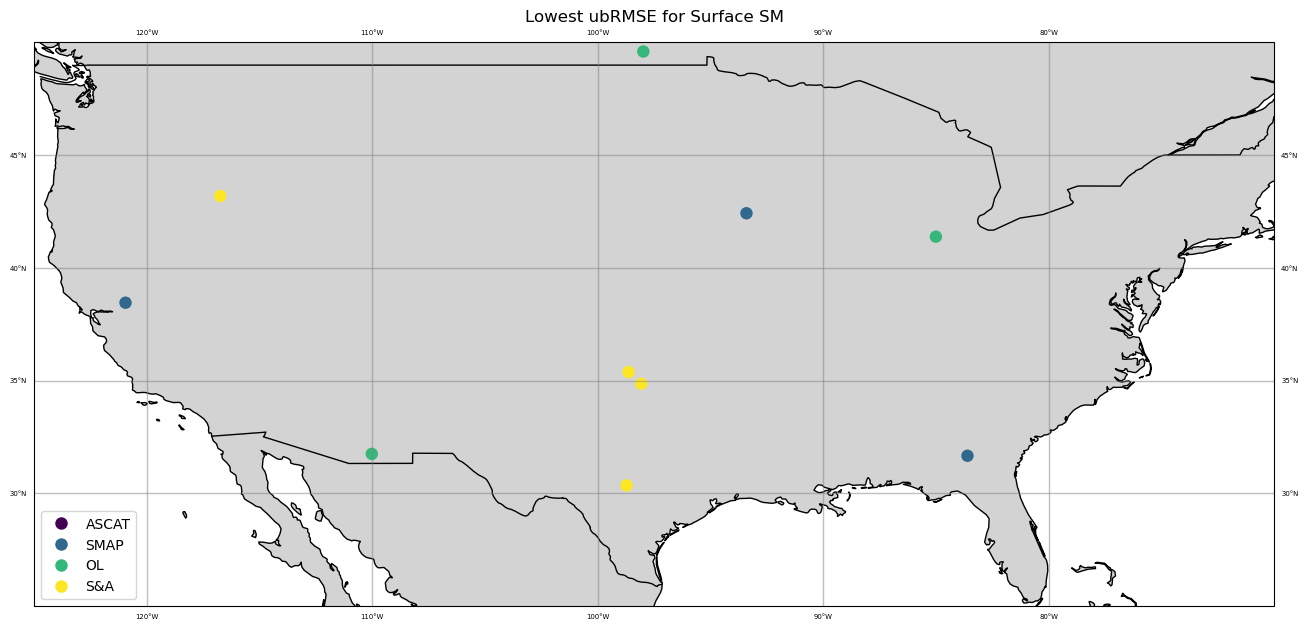

In [28]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
from matplotlib.lines import Line2D

# Create the plot
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=0))

# Set the extent to North America
ax.set_extent([-125, -70, 25, 50], crs=ccrs.PlateCarree())

# plot grid lines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                    linewidth=1, color='gray', alpha=0.5, linestyle='-')
gl.xlabel_style = {'size': 5, 'color': 'black'}
gl.ylabel_style = {'size': 5, 'color': 'black'}
ax.tick_params(labelbottom=False, labeltop=False, labelleft=False, labelright=False)

ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor='lightgray')  # Set the land color to light gray    
ax.add_feature(cfeature.BORDERS)

# scatter data
sc = ax.scatter(INSITU_lon, INSITU_lat, c=best_experiment, s=80, linewidth=0,
                 transform=ccrs.PlateCarree()) 

# Create a legend
legend_labels = expt_labels
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=sc.cmap(sc.norm(i)), label=label, markersize=10) for i, label in enumerate(legend_labels)]
ax.legend(handles=legend_elements, loc='lower left')

# Add a title
plt.title("Lowest ubRMSE for Surface SM")

plt.savefig(expt_name + '_best_expt_ubRMSE_NA.png')

plt.show()

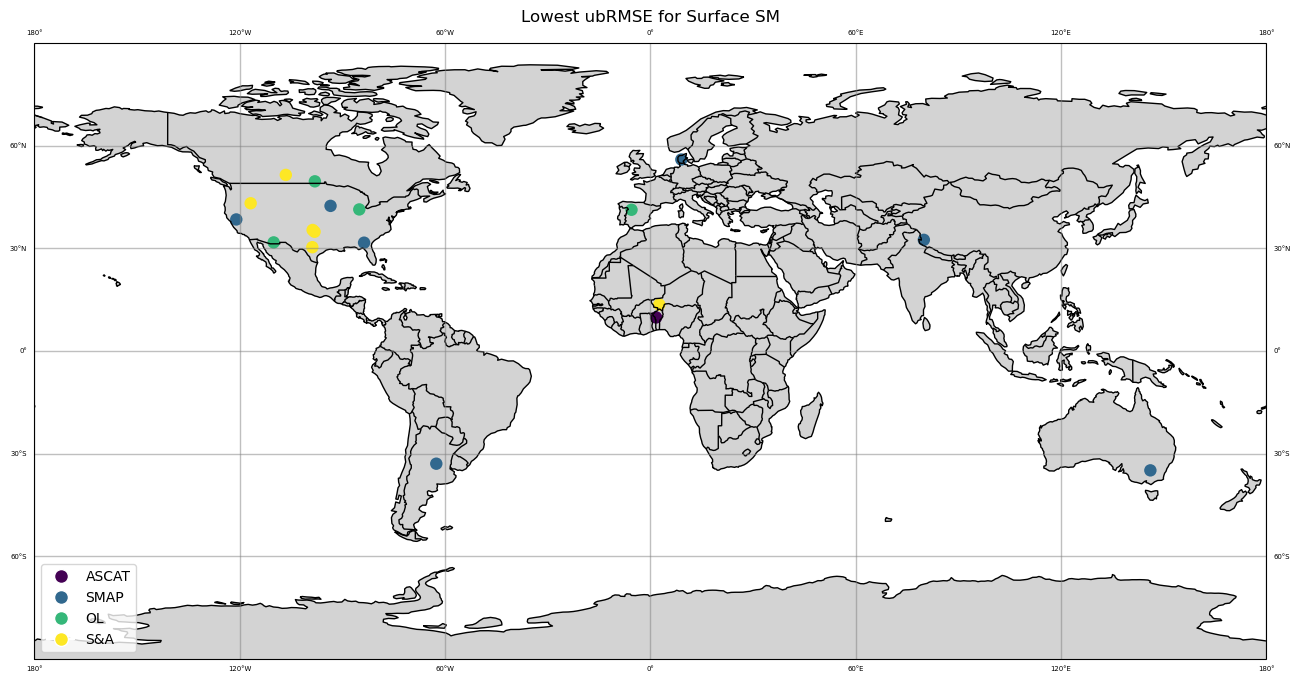

In [29]:
# Create the plot
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=0))

# Set the extent to North America
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())

# plot grid lines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                    linewidth=1, color='gray', alpha=0.5, linestyle='-')
gl.xlabel_style = {'size': 5, 'color': 'black'}
gl.ylabel_style = {'size': 5, 'color': 'black'}
ax.tick_params(labelbottom=False, labeltop=False, labelleft=False, labelright=False)

ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor='lightgray')  # Set the land color to light gray    
ax.add_feature(cfeature.BORDERS)

# scatter data
sc = ax.scatter(INSITU_lon, INSITU_lat, c=best_experiment, s=80, linewidth=0,
                 transform=ccrs.PlateCarree()) 

# Create a legend
legend_labels = expt_labels
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=sc.cmap(sc.norm(i)), label=label, markersize=10) for i, label in enumerate(legend_labels)]
ax.legend(handles=legend_elements, loc='lower left')

# Add a title
plt.title("Lowest ubRMSE for Surface SM")

plt.savefig(expt_name + '_best_expt_ubRMSE_global.png')

plt.show()